In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


In [127]:
data = pd.read_csv('matches.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Today we will be analysis stats related to the toss. We will be looking at what did teams generally do after they have won the toss. How much percentage of the team won matches after winning the toss and batting first. How many won matches after winning the toss and bowling first. How many team won matches after losing the toss.

Now we will be looking at what teams generally do after winning the toss.

In [128]:
tossdecision = data.groupby(['toss_decision']).size()
tossdecision

toss_decision
bat      283
field    413
dtype: int64

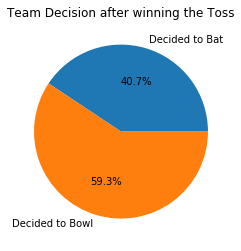

In [129]:
tossdecision.plot(kind = 'pie',labels = ['Decided to Bat','Decided to Bowl'],autopct='%1.1f%%')
plt.title('Team Decision after winning the Toss')
plt.xlabel('')
plt.ylabel('')
plt.show()

Here we can see that around 60% of the teams decided to Bowl first after winning the toss.

# Do toss winner win matches?

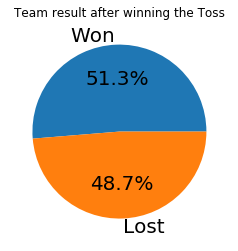

In [130]:
toss_win = data[data['toss_winner'] == data['winner']]
slices = [len(toss_win),len(data) - len(toss_win)]
slices = pd.Series(slices)
labels = ['Won','Lost']
slices.plot(kind = 'pie',labels = labels,autopct = '%1.1f%%',fontsize  = 20)
plt.title('Team result after winning the Toss')
plt.xlabel('')
plt.ylabel('')
plt.show()

So we see that this is almost similar . i.e. there is equal chances of winning or losing the match after winning the toss

Now we will look at the number of times team won after they chose to bat first after winning the toss.

In [131]:
toss_win = data[data['toss_winner'] == data['winner']]
toss_win_bat = toss_win.groupby(['toss_decision']).size()
print('Number of times team won after winning the toss:',len(toss_win))
print('Number of times team won after winning the toss and deciding to bat first:',toss_win_bat['bat'])
print('Number of times team won after winning the toss and deciding to field first:',len(toss_win) - toss_win_bat['bat'])


Number of times team won after winning the toss: 357
Number of times team won after winning the toss and deciding to bat first: 129
Number of times team won after winning the toss and deciding to field first: 228


Follwing is the pie chart showing the same. Showing how many percent of the times team decided to bat first or field first and won the game

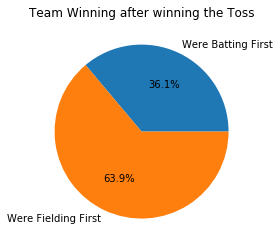

In [132]:
toss_win_bat.plot(kind = 'pie',labels = ['Were Batting First','Were Fielding First'],autopct='%1.1f%%')
plt.title('Team Winning after winning the Toss')
plt.xlabel('')
plt.ylabel('')
plt.show()

This graph shows that the percentage of team winning the toss and then selection to bat first and eventually winning the game is 36%. So a majority of the teams winning after winning the toss opt to bowl first rather than bat.


In [133]:
toss_loss = data[data['toss_winner'] != data['winner']]
toss_loss_bat = toss_loss.groupby(['toss_decision']).size()
toss_loss_bat
print('Number of times team lost after winning the toss:',len(toss_loss))
print('Number of times team lost after winning the toss and deciding to bat first:',toss_loss_bat['bat'])
print('Number of times team lost after winning the toss and deciding to field first:',len(toss_win) - toss_loss_bat['bat'])


Number of times team lost after winning the toss: 339
Number of times team lost after winning the toss and deciding to bat first: 154
Number of times team lost after winning the toss and deciding to field first: 203


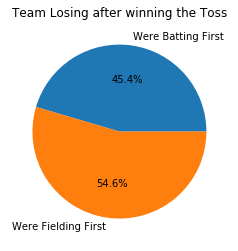

In [134]:
toss_loss_bat.plot(kind = 'pie',labels = ['Were Batting First','Were Fielding First'],autopct='%1.1f%%')
plt.title('Team Losing after winning the Toss')
plt.xlabel('')
plt.ylabel('')
plt.show()

This shows that 45.4% fo the times team was batting first, when the won the toss but lost the game.  

Now we will be looking at what team did after winning the toss in all the different seasons.


# Team Winning the Toss and their Decisions

In [135]:
tossdecision_season = pd.DataFrame(data.groupby(['toss_decision','season']).size())
tossdecision_season.columns = ['Number of Times']
tossdecision_season.reset_index(inplace= True)
tossdecision_season

,toss_decision,season,Number of Times
0,bat,2008,26
1,bat,2009,35
2,bat,2010,39
3,bat,2011,25
4,bat,2012,37
5,bat,2013,45
6,bat,2014,19
7,bat,2015,25
8,bat,2016,11
9,bat,2017,11


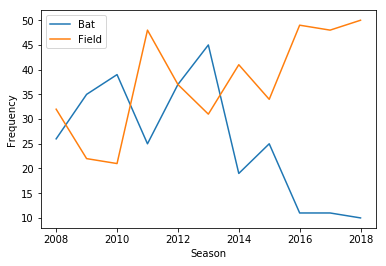

In [136]:
tossdecision_season.groupby(['season','toss_decision']).mean()['Number of Times'].unstack().plot() 
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.legend(['Bat','Field'])
plt.show()

This shows us what the teams generally decided to do after winning the toss in each of the seasons. As you can see initially the teams were more inclined to bat first except for one year i.e. 2011 in which they were more inclined to bowl first. But in the last three years most of the times have decided to bowl first after winning the toss. We are noticing this change because nowadays the game is changing and it is becoming more and more easy to chase games. Next we will how many time teams won after winning the toss across all seasons.

In [137]:
toss_win_season = data[data['toss_winner'] == data['winner']]
toss_win_bat_season = pd.DataFrame(toss_win_season.groupby(['toss_decision','season']).size())
toss_win_bat_season.columns = ['Number of Times Won']
toss_win_bat_season.reset_index(inplace= True)
toss_win_bat_season['Percentage'] = toss_win_bat_season['Number of Times Won']/tossdecision_season['Number of Times']*100
toss_win_bat_season


,toss_decision,season,Number of Times Won,Percentage
0,bat,2008,9,34.615385
1,bat,2009,19,54.285714
2,bat,2010,21,53.846154
3,bat,2011,11,44.000000
4,bat,2012,15,40.540541
5,bat,2013,21,46.666667
6,bat,2014,6,31.578947
7,bat,2015,14,56.000000
8,bat,2016,2,18.181818
9,bat,2017,6,54.545455


# Percentage of Times team won after they won the toss and their decision

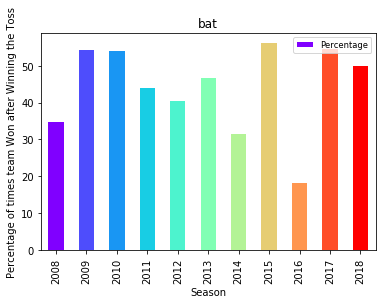

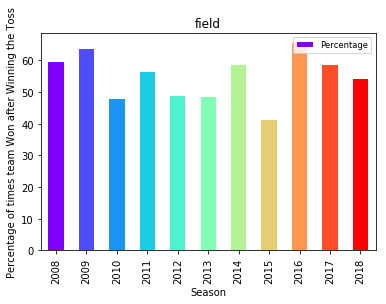

In [138]:
colors = cm.rainbow(np.linspace(0, 1, len(toss_win_bat_season['season'].unique())))
for title, group in toss_win_bat_season.groupby('toss_decision'):
    group.plot(x='season', y='Percentage', title=title,kind = 'bar',color = colors)
    plt.legend(loc=1, fontsize = 'small')
    plt.xlabel('Season')
    plt.ylabel('Percentage of times team Won after Winning the Toss')
    

This shows that intially a higher number of teams when when they decided to field first than when they decided to bat first. The trend for field is still the same with higher number of teams winning the match when they decide to field first. 

# Percentage of times team lost after they won the toss and their decision

In [139]:
toss_loss_season = data[data['toss_winner'] != data['winner']]
toss_loss_bat_season = pd.DataFrame(toss_loss_season.groupby(['toss_decision','season']).size())
toss_loss_bat_season.columns = ['Number of Times Lost']
toss_loss_bat_season.reset_index(inplace= True)
toss_loss_bat_season['Percentage'] = toss_loss_bat_season['Number of Times Lost']/tossdecision_season['Number of Times']*100
toss_loss_bat_season


,toss_decision,season,Number of Times Lost,Percentage
0,bat,2008,17,65.384615
1,bat,2009,16,45.714286
2,bat,2010,18,46.153846
3,bat,2011,14,56.000000
4,bat,2012,22,59.459459
5,bat,2013,24,53.333333
6,bat,2014,13,68.421053
7,bat,2015,11,44.000000
8,bat,2016,9,81.818182
9,bat,2017,5,45.454545


Text(0.5, 1.0, 'Losing Percentage of Team after Winning the Toss and their Decision')

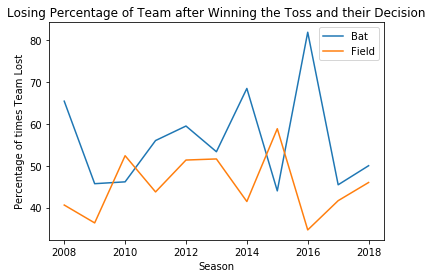

In [140]:

toss_loss_bat_season.groupby(['season','toss_decision']).mean()['Percentage'].unstack().plot() 
plt.xlabel('Season')
plt.ylabel('Percentage of times Team Lost')
plt.legend(['Bat','Field'])
plt.title('Losing Percentage of Team after Winning the Toss and their Decision')

This tells us about how many percentage of the times team lost after winning the toss and what was their decision.

# Does winning the toss means winning the match?

In [141]:
finals = pd.DataFrame(data.groupby(['season']).last())
finals 
#Required dataset

,id,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
season,,,,,,,,,,,,,,,,,
2008,117,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
2009,174,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
2010,234,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
2011,307,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
2012,381,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
2013,457,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
2014,517,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
2015,576,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
2016,636,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


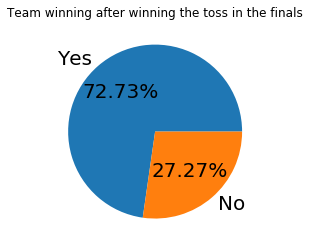

In [142]:
final_data = finals[finals['toss_winner'] == finals['winner']]
slices = pd.Series([len(final_data),len(finals) - len(final_data)])
labels = ['Yes','No']
slices.plot(kind = 'pie',labels = labels,fontsize = 20,autopct = '%.2f%%')
plt.xlabel('')
plt.ylabel('')
plt.title('Team winning after winning the toss in the finals')
plt.show()

This stats of the finals seems to be very different from all the matches. As you can see here that team winning after winning the toss is around 73% here. But from the above graph it is just 51%. This shows how important winning the toss becomes for the teams in the finals 

So we can see that most of the times the team winning the toss has won the finals.


In [143]:
print('Number of Times team wins the finals after deciding to bat:' ,len(final_data[final_data['toss_decision'] == 'bat']))
print('Number of Times team wins the finals after deciding to bowl:',len(final_data) - bat_win)

Number of Times team wins the finals after deciding to bat: 5
Number of Times team wins the finals after deciding to bowl: 3


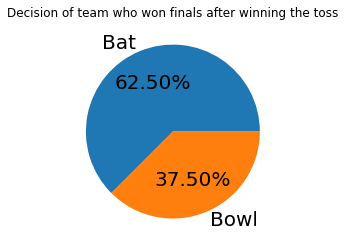

In [144]:
slices = pd.Series([len(final_data[final_data['toss_decision'] == 'bat']),
                    len(final_data) - len(final_data[final_data['toss_decision'] == 'bat'])])
labels = ['Bat','Bowl']
slices.plot(kind = 'pie',labels = labels,fontsize = 20,autopct = '%.2f%%')
plt.xlabel('')
plt.ylabel('')
plt.title('Decision of team who won finals after winning the toss')
plt.show()

Here is also another interesting fact about the decision team makes after winning the toss in the finals and the rest of matches. Team won wins in the finals were batting first 62.5% of the times. But for the rest of the matches team won wins the games were batting only 36% of the times. This also shows teams like to post total in the finals as the chasing team has an additional pressure